### 프로젝트 목표: 핫플레이스가 있는 행정동에서 인구가 가장 적은 시간대 파악하기

In [1]:
import csv

f = open('./data/LOCAL_PEOPLE_DONG_201912.csv', encoding='utf8') # 또는 'eur-kr', 'cp949'
data = csv.reader(f)
next(data)
data = list(data)
print(len(data))

315456


In [2]:
f2 = open('./data/dong_code.csv', encoding = 'cp949')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print(len(code_data))

424


In [3]:
print(len(data[0]))
print(data[0])

33
['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [4]:
for row in data:
    for i in range(1,32):
        if i<=2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [5]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [6]:
for row in code_data:
    row[1] = int(row[1])
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [7]:
dong_name = input('행정동명 입력 >')
dong_code = 0
for row in code_data:
    if dong_name == row[-1]:
        dong_code = row[1]
print(dong_code)

11680545


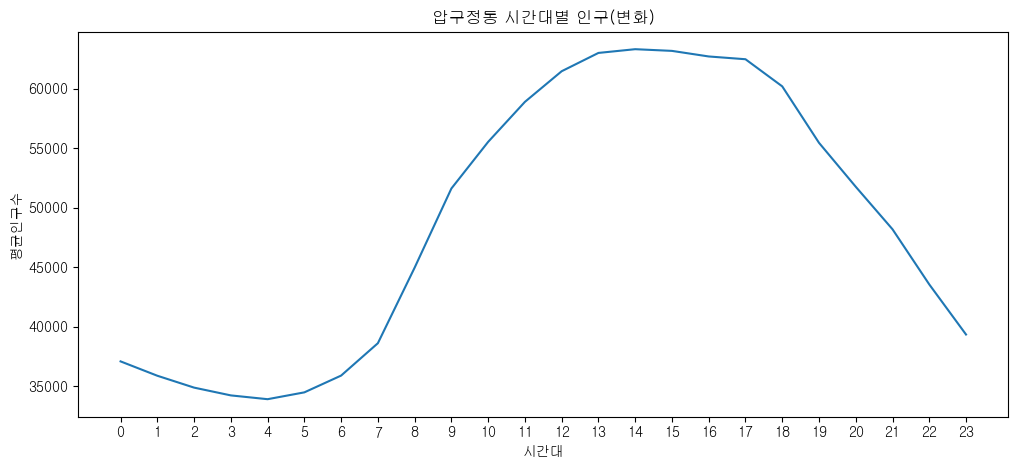

In [8]:
# 핫플레이스가 있는 행정동의 시간대별 평균인구 그래프
# row[2] # 행정동
# row[1] # 시간대
# row[3] # 총생활인구수
import matplotlib.pyplot as plt

times={}
time = 0
counts = 0

for row in data:
    if dong_code == row[2]:
        time, counts = row[1], row[3]
        if time not in times.keys():
            times[time] = counts
        else:
            times[time] += counts
for k, v in times.items(): #평균값 구하기
    times[k] = v / 31

plt.rc('font', family='Gulim')
plt.figure(figsize=(12,5))
plt.plot(times.keys(), times.values())
plt.title(dong_name + ' 시간대별 인구(변화)')
plt.xticks(range(24), range(24)) # x축 눈금
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

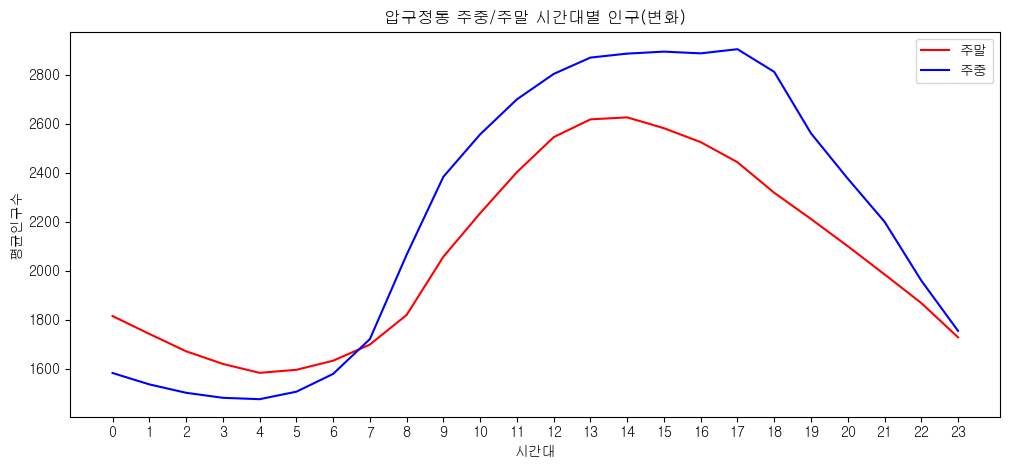

In [9]:
# 핫플레이스가 있는 행정동의 주중/주말 시간대별 평균인구 그래프
import datetime

times_weekend, times_weekday = {}, {}
time, count, weekend_cnt, weekday_cnt = 0, 0, 0, 0

for row in data:
    if dong_code == row[2]:
        time, counts = row[1], row[3]
        # 주말 주중 구분 용도
        year, month, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][-2:])
        select = datetime.date(year,month,day).weekday() # 0-월, 1-화, 2-수, 3-목, 4-금, 5-토, 6-일
        # print(select, end=' ')
        if select == 5 or select == 6: # 주말이야
            if time not in times_weekend.keys():
                times_weekend[time] = counts
                weekend_cnt = 1
            else:
                times_weekend[time] += counts
                weekend_cnt += 1
        else: # 아니야
            if time not in times_weekday.keys():
                times_weekday[time] = counts
                weekday_cnt = 1
            else:
                times_weekday[time] += counts
                weekday_cnt += 1

for k, v in times_weekend.items(): # 주말 평균값 구하기
    times_weekend[k] = v / weekend_cnt
for k, v in times_weekday.items(): # 주중 평균값 구하기
    times_weekday[k] = v / weekday_cnt

plt.rc('font', family='Gulim')
plt.figure(figsize=(12,5))
plt.plot(times_weekend.keys(), times_weekend.values(), label='주말', color='red')
plt.plot(times_weekday.keys(), times_weekday.values(), label='주중', color="blue")
plt.title(dong_name + ' 주중/주말 시간대별 평균인구(변화)')
plt.xticks(range(24), range(24)) # x축 눈금
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()


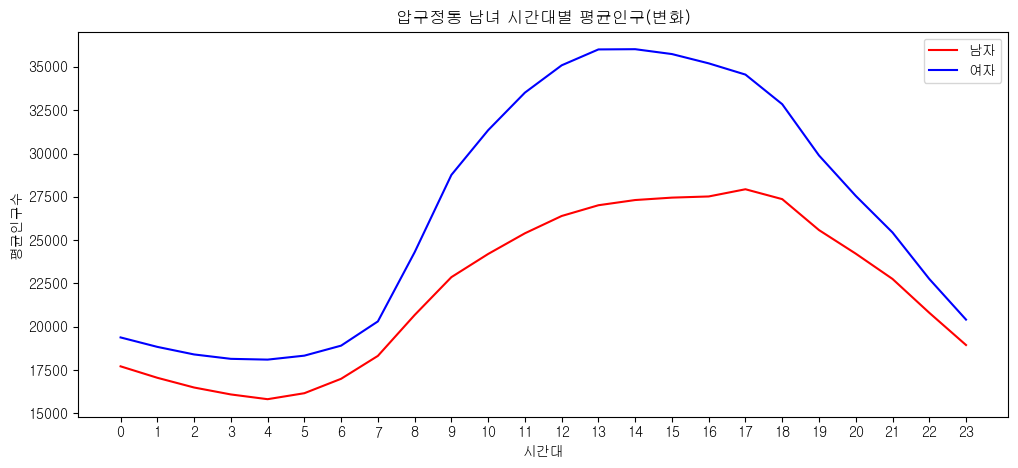

In [71]:
# 남녀 시간대별 평균인구 분석하기
male, female = {}, {}
time, male_total, female_total, male_cnt, female_cnt = 0, 0, 0, 0, 0
for row in data:
    if dong_code == row[2]:
        time, male_total, female_total = row[1], row[4:18], row[18:32]
        # male_total = row[4:18] # 총 14개
        # print(male_total[13])
        # print(sum(male_total))

        # 남자 처리
        if time not in male.keys():
            male[time] = sum(male_total)
            male_cnt = 1
        else:
            male[time] += sum(male_total)
            male_cnt += 1
    
        # 여자 처리
        if time not in female.keys():
            female[time] = sum(female_total)
            female_cnt = 1
        else:
            female[time] += sum(female_total)
            female_cnt += 1

for k, v in male.items(): # 남자 평균값 구하기
    male[k] = v / 31
for k, v in female.items(): # 여자 평균값 구하기
    female[k] = v / 31

plt.rc('font', family='Gulim')
plt.figure(figsize=(12,5))
plt.plot(male.keys(), male.values(), label='남자', color='red')
plt.plot(female.keys(), female.values(), label='여자', color="blue")
plt.title(dong_name + ' 남녀 시간대별 평균인구(변화)')
plt.xticks(range(24), range(24)) # x축 눈금
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

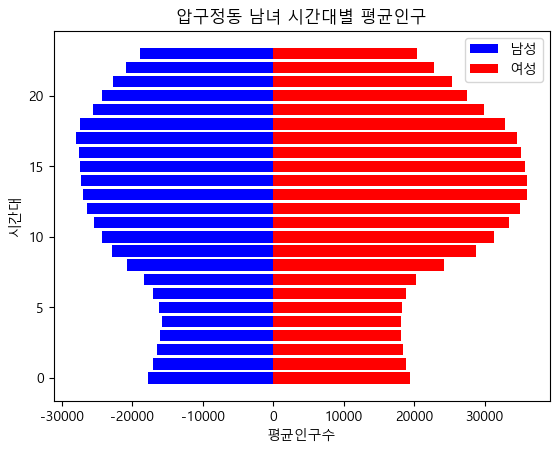

In [72]:
# 비교 그래프
import matplotlib
male = [-v for v in male.values()]
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균인구')
plt.barh(range(24), male, color='b', label ='남성')
plt.barh(range(24), female.values(), color='r', label='여성')
plt.xlabel('평균인구수')
plt.ylabel('시간대')
plt.legend()
plt.show()

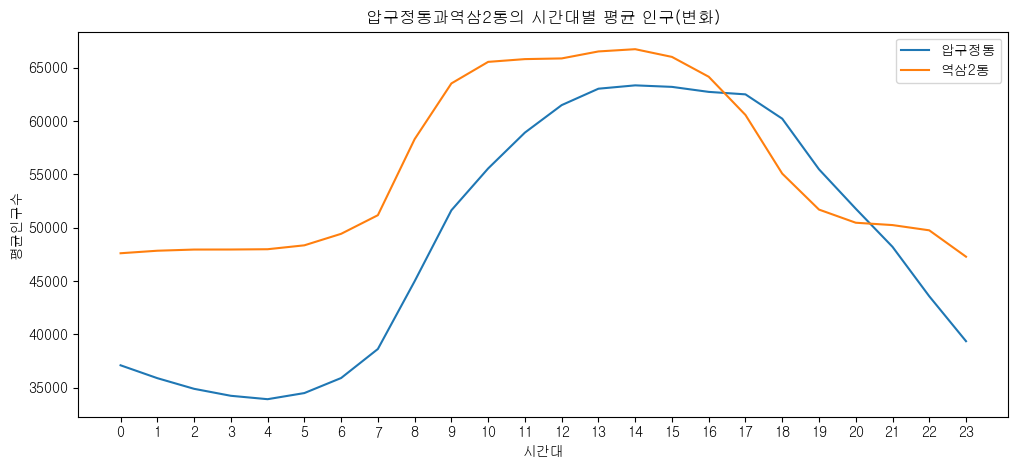

In [80]:
# 다른 지역과 인구 비교 분석하기
# 핫플레이스가 있는 행정동의 시간대별 평균인구 그래프
# row[2] # 행정동
# row[1] # 시간대
# row[3] # 총생활인구수
import matplotlib.pyplot as plt

dong_name = input('행정동명 입력 >')
dong_code = 0
for row in code_data:
    if dong_name == row[-1]:
        dong_code = row[1]

dong_name2 = input('비교하고자 하는 행정동명 입력 >')
dong_code2 = 0
for row in code_data:
    if dong_name2 == row[-1]:
        dong_code2 = row[1]

times, times2 = {}, {}
time, time2, counts, counts2 = 0, 0, 0, 0

for row in data:
    if dong_code == row[2]:
        time, counts = row[1], row[3]
        if time not in times.keys():
            times[time] = counts
        else:
            times[time] += counts
for k, v in times.items(): #평균값 구하기
    times[k] = v / 31

for row in data:
    if dong_code2 == row[2]:
        time2, counts2 = row[1], row[3]
        if time2 not in times2.keys():
            times2[time2] = counts2
        else:
            times2[time2] += counts2
for k, v in times2.items(): #평균값 구하기
    times2[k] = v / 31

plt.rc('font', family='Gulim')
plt.figure(figsize=(12,5))
plt.plot(times.keys(), times.values(), label = dong_name)
plt.plot(times2.keys(), times2.values(), label = dong_name2)
plt.title(dong_name + '과' + dong_name2 + '의 시간대별 평균 인구(변화)')
plt.xticks(range(24), range(24)) # x축 눈금
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()